<div style="color: #2590c2; text-align: center;">
<span style="font-size:18pt;"><b>ST: BIG DATA ANALYTICS</b></span><br/>
<span>CS 696-16 (Fall'18)</span><br/><br/>
<span><b>Project 1</b></span><br/><br/>
<span>Submitted By</span><br/>
<span>Ashok Kumar Shrestha</span>
</div>

In [ ]:
# Datasets from Kaggle
# Challenges in Representation Learning: Facial Expression Recognition Challenge
# source: https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

In [3]:
import csv, sys
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

def load_facedata():
    filename = '../fer2013.csv'
    data = []
    label = []
    w, h = 48, 48
    image = np.zeros((h, w), dtype=np.uint8)
    cnt = 0
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        try:
            for row in reader:
                cnt += 1
                if cnt>1:
                    emotion = int(row[0]) - 1
                    pixels = list(map(int, row[1].split()))
                    pixels_array = np.asarray(pixels)
                    
                    data.append(pixels_array)
                    label.append(emotion)
    
        except csv.Error as e:
            sys.exit('file %s, line %d: %s' % (filename, reader.line_num, e))
            
    return data, label


def face_data():
    data, label = load_facedata()

    X = np.array(data)[:]
    y = np.asarray(label)[:]

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    return (X_train, Y_train), (X_test, Y_test)

Starting Network...
-------------------------------------------------------
Reading Data sets...
CIFAR data loaded.
PCA Components: 213
Input shape:  (213,)
-------------------------------------------------------
Begin Training...
Epoch 1/20
10000/10000 [==============================] - 0s 43us/step - loss: 3.1276 - acc: 0.1412
Epoch 2/20
10000/10000 [==============================] - 0s 8us/step - loss: 2.1120 - acc: 0.2802
Epoch 3/20
10000/10000 [==============================] - 0s 8us/step - loss: 1.8597 - acc: 0.3585
Epoch 4/20
10000/10000 [==============================] - 0s 8us/step - loss: 1.7066 - acc: 0.4110
Epoch 5/20
10000/10000 [==============================] - 0s 8us/step - loss: 1.5907 - acc: 0.4542
Epoch 6/20
10000/10000 [==============================] - 0s 8us/step - loss: 1.4988 - acc: 0.4851
Epoch 7/20
10000/10000 [==============================] - 0s 9us/step - loss: 1.4185 - acc: 0.5191
Epoch 8/20
10000/10000 [==============================] - 0s 8us/step - los

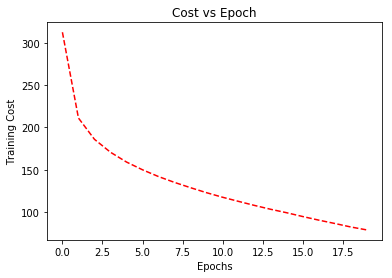

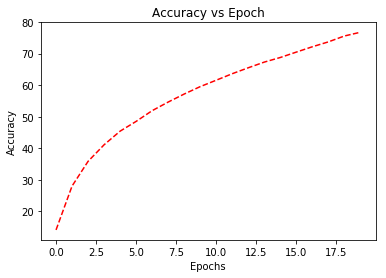

In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.utils import np_utils
from keras.datasets import mnist
from keras.datasets import cifar10
from keras import backend as K
K.set_image_dim_ordering('th')
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def show_graph(epoch, history, title="Cost vs Epoch",xlabel="Epochs",ylabel="Training Cost",image_name="cost_vs_epochs.png"):
        epochs = range(epoch)
        
        epochs = np.reshape(epochs,(-1,1))
        history = np.reshape(history,(-1,1)) *100
        
        plt.plot(epochs, history,"r--")
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.savefig(image_name)
        plt.show()

def read_data(file="mnist", n_classes = 10):
    if file=="mnist":
        (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
        c = 1
        w,h = X_train.shape[1:]
        print("MNIST data loaded.")
    elif file=="cifar10":
        (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
        c,w,h = X_train.shape[1:]
        print("CIFAR data loaded.")
    elif file=="face_data":
        (X_train, Y_train), (X_test, Y_test) = face_data()
        c,w,h = 1,48,48
        print("Face data loaded.")
    
    #X_train = X_train.reshape(X_train.shape[0], c,w,h)
    #X_test = X_test.reshape(X_test.shape[0], c,w,h)
    X_train = X_train.reshape(X_train.shape[0], c*w*h)
    X_test = X_test.reshape(X_test.shape[0], c*w*h)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255

    Y_train = np_utils.to_categorical(Y_train, n_classes)
    Y_test = np_utils.to_categorical(Y_test, n_classes)
    
    return (X_train, Y_train), (X_test, Y_test)

def main(file="mnist", batch_size = 512, epochs = 10):
    print("Starting Network...")
    print("-------------------------------------------------------")
    print("Reading Data sets...")
    
    num_classes = 7
    (X_train, Y_train), (X_test, Y_test) = read_data(file, n_classes=num_classes)
    
    #input_shape = X_train.shape[1:]
    
    X_train = X_train[:10000]
    Y_train = Y_train[:10000]
    X_test = X_test[:]
    Y_test = Y_test[:]
    
    #print(X_train.shape, X_test.shape)
    scaler = StandardScaler()

    # Fit on training set only.
    scaler.fit(X_train)

    # Apply transform to both the training set and the test set.
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    pca = PCA(0.95)
    pca.fit(X_train)
    print("PCA Components: {0}".format(pca.n_components_))
    input_shape = (pca.n_components_,)
    print("Input shape: ", input_shape)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    
    print("-------------------------------------------------------")
    print("Begin Training...")
    
    model = Sequential()
    model.add(Dense(128, activation='relu',input_shape=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1)
    
    print("End Training.")
    print("-------------------------------------------------------")
    print("Begin Testing...")
    
    score = model.evaluate(X_test, Y_test, verbose=0)
    test_loss = score[0]
    test_accuracy = score[1]*100
    
    print("End Testing.")
    print("-------------------------------------------------------")
    
    print('Test Error: {0}'.format(test_loss))
    print('Test Accuracy: {0:0.2f} %'.format(test_accuracy))
    
    show_graph(epochs, history.history['loss'], 
               title="Cost vs Epoch",
               xlabel="Epochs",
               ylabel="Training Cost",
               image_name="cost_vs_epochs.png")
    
    show_graph(epochs, history.history['acc'], 
               title="Accuracy vs Epoch",
               xlabel="Epochs",
               ylabel="Accuracy",
               image_name="accuracy_vs_epochs.png")


if __name__=="__main__":
    #main(file="mnist", batch_size = 512, epochs = 50)
    #main(file="cifar10", batch_size = 512, epochs = 20)
    main(file="face_data", batch_size = 512, epochs = 100)
    